# Data Analytics - Exploratory Data Analysis (EDA) on Titanic Dataset

### 1. Importing Required Libraries

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### 2. Loading dataset:- 

In [24]:
#loading titanic dataset
df = sns.load_dataset('titanic')

#display first five records in the dataset
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### 3. Preview Datset

In [25]:
df.shape

(891, 15)

Dataset has 891 rows and 15 columns.

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [27]:
df.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

##### Missing Values Treatment

In [28]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

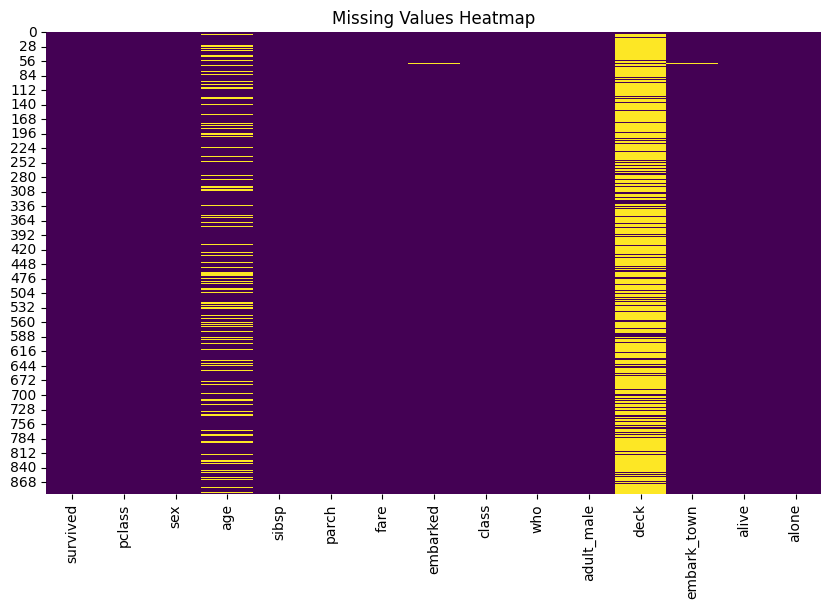

In [ ]:
#visualization of null values in the dataset
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

Some columns like age, embarked, deck and embark_town have missing values.

In [30]:
#age columns null value treatment 
df['age'].fillna(df['age'].mean(),inplace=True)

In [31]:
#Deck ,embarked and embarked_town columns having null values , so we need to fill using mode value. because these columns is categorical 
df['deck'].fillna(df['deck'].mode()[0],inplace=True)
df['embarked'].fillna(df['embarked'].mode()[0],inplace=True)
df['embark_town'].fillna(df['embark_town'].mode()[0],inplace=True)

In [32]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

##### Statistical Analysis

In [33]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Age
###### Average passenger was about 30 years old.
###### Youngest was less than 1, oldest was 80.


Fare
###### Ticket prices varied a lot.
###### Average fare: ₹32 (not actual INR; just units in the dataset).
###### Some people paid ₹512, most paid much less — big difference due to travel class.

SibSp (Siblings/Spouses onboard)
###### Most people traveled alone.
###### A few had up to 8 family members with them.

Parch (Parents/Children onboard)
###### Like SibSp, most had no parents or children with them.
###### Highest was 6 family members.

Pclass (Travel Class)
###### There are 3 classes (1 = high, 3 = low).
###### Most passengers were in Class 3.

Survived
###### About 38% survived, meaning most people didn’t

### 4.EDA

#### Distribution of Numerical Features

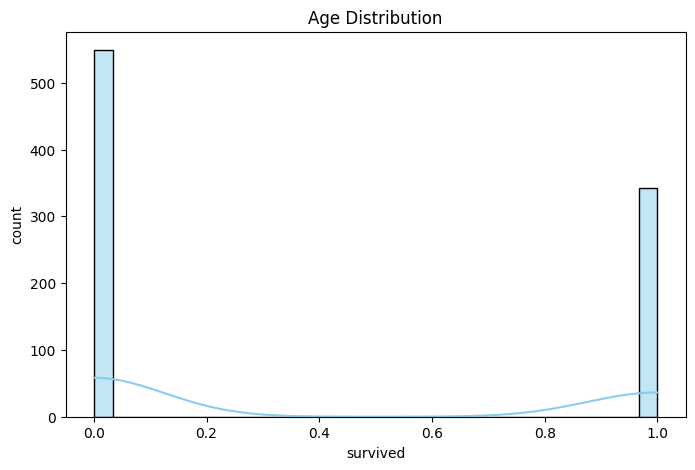

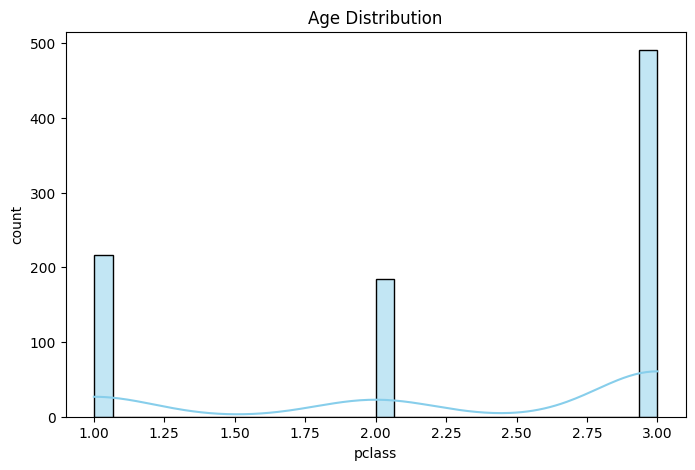

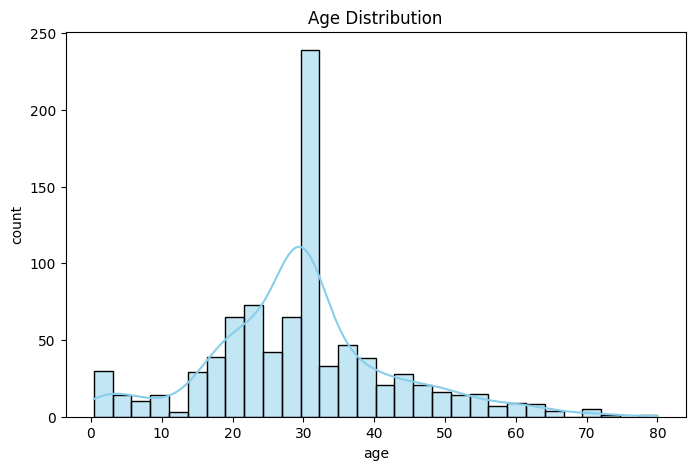

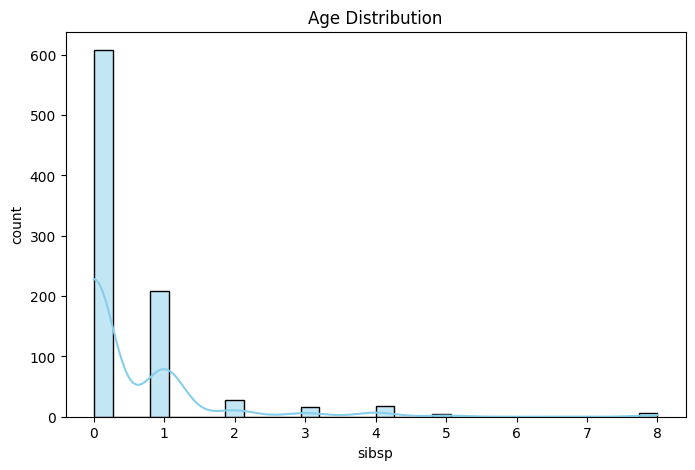

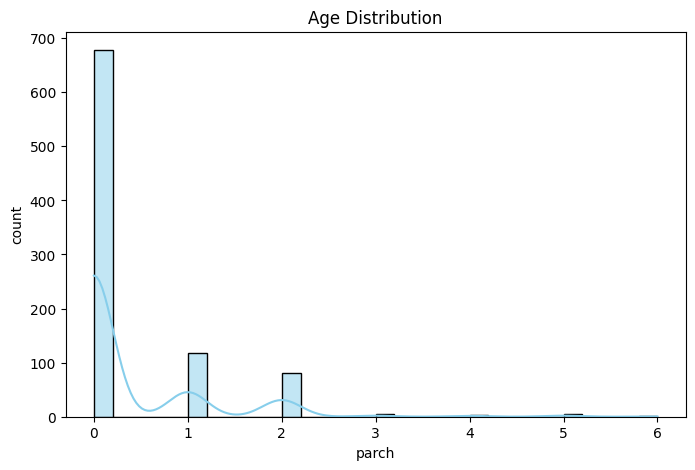

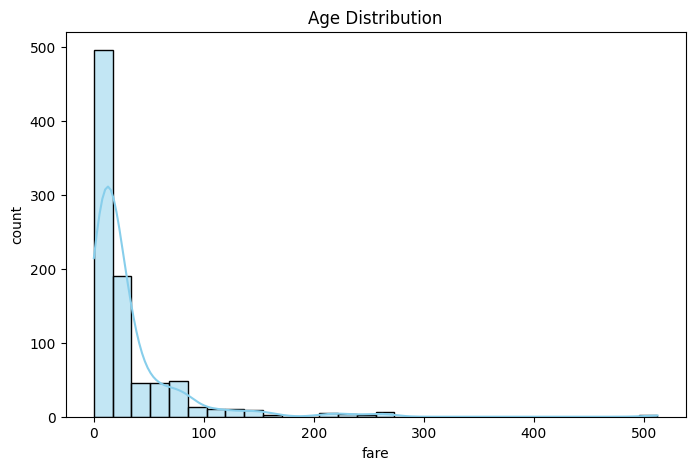

In [37]:
for i in df.select_dtypes(include=['int64','float64']).columns:
    plt.figure(figsize=(8,5))
    sns.histplot(df[i], kde=True, bins=30, color='skyblue')
    plt.title("Age Distribution")
    plt.xlabel(i)
    plt.ylabel("count")
    plt.show()


Observations:

Most passengers were 20–40 years old.

parch,sibsp,pclass,served and fare is right-skewed with a few high-paying outliers.

#### Correlation Heatmap

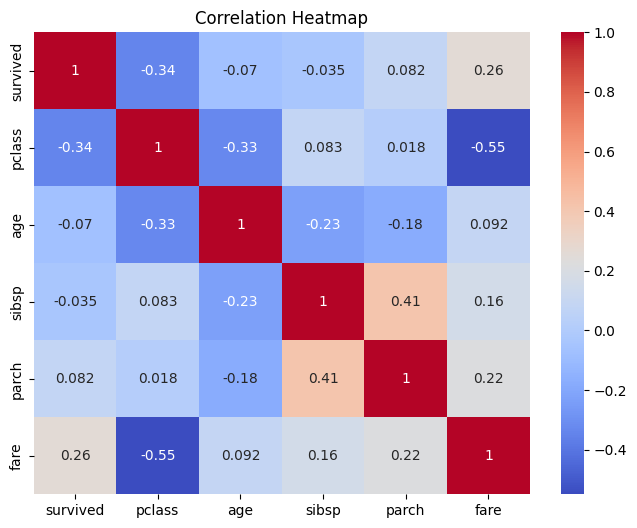

In [47]:
num_df = df.select_dtypes(include='number')
plt.figure(figsize=(8,6))
plt.title("Correlation Heatmap")
sns.heatmap(num_df.corr(), annot=True, cmap='coolwarm')
plt.show()

Observation:

pclass and fare show a strong negative correlation.

fare has a moderate positive correlation with survived.

age has a weak correlation with survival.

### 5 .Feature Relationship

##### Survival by sex

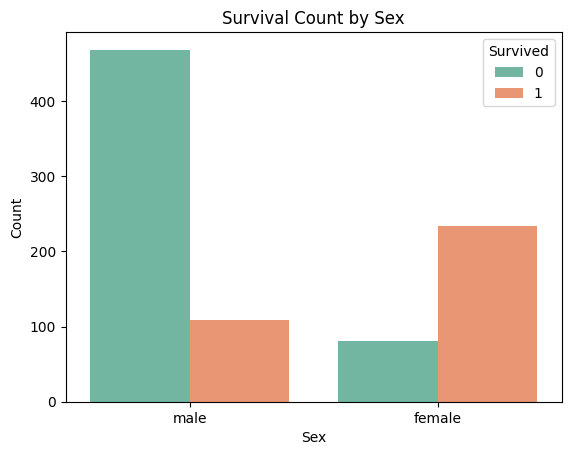

In [38]:
sns.countplot(x='sex', hue='survived', data=df, palette='Set2')
plt.title("Survival Count by Sex")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.legend(title='Survived')
plt.show()

##### Servived by class

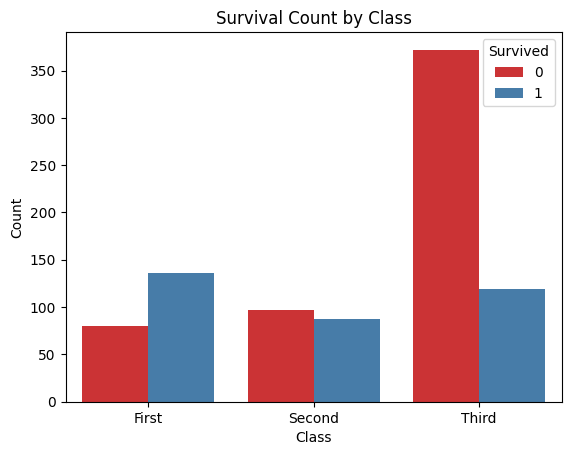

In [39]:
sns.countplot(x='class', hue='survived', data=df, palette='Set1')
plt.title("Survival Count by Class")
plt.xlabel("Class")
plt.ylabel("Count")
plt.legend(title='Survived')
plt.show()


##### Servived by age

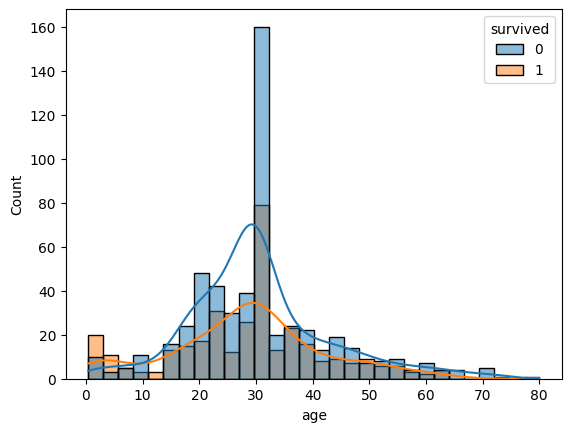

In [45]:
sns.histplot(data=df, x='age', hue='survived', kde=True, bins=30)
plt.show()

Observations:

Females had a much higher survival rate than males.

1st class passengers had the highest survival rate.

# Summaries of key insights

| Area                 | Insight                                                     |
| -------------------- | ----------------------------------------------------------- |
| **Missing Data**     | `deck` and `age` have missing values                        |
| **Age**              | Most passengers were 20–40 years old                        |
| **Fare**             | Right-skewed with a few high outliers                       |
| **Sex & Survival**   | Females survived more                                       |
| **Class & Survival** | 1st class had highest survival                              |
| **Correlation**      | `fare` and `pclass` show moderate correlation with survival |
